<a href="https://colab.research.google.com/github/nicomurci/Taller-3-Grupo-Opain/blob/main/Taller_3_Ciencia_de_Datos_Aplicada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/Kmilo29/repository/main/images/encabezado.png" ><br>

# **MINE-4101: Ciencia de Datos Aplicada**
## **Universidad de los Andes**
Segundo Semestre - 2023


## **Estudiantes**

* Sebastian Arango Loaiza
* Nicolas Adolfo Castillo Betancourt
* Johan David Rodriguez Portela
* Ivan Camilo Delgado Cañon

# **ENTREGA TALLER 3**

## **Tema: Clasificación**


## **Objetivo**

El objetivo de este taller es evaluar las capacidades del estudiante para aplicar diferentes técnicas de experimentación para la construcción de un modelo de clasificación que minimice tanto como sea posible el error de predicción. Adicionalmente, se espera que estos modelos sean disponibilizados mediante una API REST para que puedan ser integrados a cualquier producto de datos. No olvide realizar los ejercicios previos pertinentes respecto a la preparación y entendimiento de los datos.

### **Contexto de Negocio:** Disminuir la tasa de Churn

El área de fidelización de una empresa de telecomunicaciones tiene como una de sus metas disminuir la tasa de churn (abandono) por parte de sus clientes. Por esta razón, desea construir modelos de machine learning que permitan predecir si un cliente es propenso abandonar los servicios que actualmente tiene contratados con la empresa. Una vez construidos, estos modelos deben ser disponibilizados a través de una API REST que pueda ser consumida por la plataforma que es usada por los asesores de call center usando dicha predicción para ofrecer nuevos productos o servicios a los clientes más
propensos al abandono.

Para cada cliente de la empresa se cuenta con la siguiente información:

## **Dataset de trabajo**

**Fuente de Datos**: [[dataset](https://drive.google.com/drive/folders/1NtHOTIPT2Z-1z1ycYXRkXSzKD0lSA1wT)].

### **Diccionario de datos**

| Field            | Description                                                |
|:-----------------|:----------------------------------------------------------|
| customerID       | Customer ID                                                |
| gender           | Whether the customer is a male or a female                  |
| SeniorCitizen    | Whether the customer is a senior citizen or not (1, 0)      |
| Partner          | Whether the customer has a partner or not (Yes, No)        |
| Dependents       | Whether the customer has dependents or not (Yes, No)       |
| tenure           | Number of months the customer has stayed with the company  |
| PhoneService     | Whether the customer has a phone service or not (Yes, No)  |
| MultipleLines    | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService  | Customer’s internet service provider (DSL, Fiber optic, No)|
| OnlineSecurity   | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup     | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport      | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV      | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies  | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract         | The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod    | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges   | The amount charged to the customer monthly                  |
| TotalCharges     | The total amount charged to the customer                    |
| Churn            | Whether the customer churned or not (Yes or No)            |


### **Importación y validación de librerías**

Las siguientes librerías se ocupan con el fin de gestionar eficientemente datos estructurados, realizar visualizaciones, entrenar modelos de aprendizaje automático y evaluar su desempeño. Desde la manipulación de datos con Pandas y NumPy hasta la construcción de modelos con Scikit-learn, estas herramientas permiten un flujo de trabajo integral para el análisis y la implementación de soluciones basadas en datos. Además, funciones como joblib facilitan el almacenamiento y la carga de modelos, vital en la fase de despliegue de soluciones de aprendizaje automático.

In [ ]:
# Librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import joblib
from sklearn.compose import make_column_selector
from scipy.stats import ks_2samp
from sklearn.feature_selection import chi2

Asegurando la compatibilidad y funcionalidad de los programas y modelos que se desarrollen, se busca verificar las versiones de las bibliotecas instaladas en el entorno de Python, lo que puede ser crucial para evitar errores futuros e inconsistencias.


In [ ]:
# Versionamientos

import pkg_resources

libraries = ["pandas", "numpy", "scikit-learn", "xgboost", "lightgbm", "uvicorn","joblib","fastapi"]
for lib in libraries:
    try:
        version = pkg_resources.get_distribution(lib).version
        print(f"{lib} == {version}")
    except pkg_resources.DistributionNotFound:
        print(f"{lib} no está instalado.")

pandas == 1.5.3
numpy == 1.23.5
scikit-learn == 1.2.2
xgboost == 2.0.2
lightgbm == 4.1.0
uvicorn no está instalado.
joblib == 1.3.2
fastapi no está instalado.


### **Cargue de Datos**

Cargando el dataset principal "historic" con el cual se realizará el desarrollo del laboratorio, y de esta forma encontrar el modelo de clasificación adecuado y con el cual posteriormente realizar pruebas a través del dataset "future"

In [ ]:
df = pd.read_json("C:/Users/Sebastián/Downloads/churn_historic.json")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,5386-THSLQ,Female,1,Yes,No,66,No,No phone service,DSL,No,...,Yes,No,Yes,No,One year,No,Bank transfer (automatic),45.55,3027.25,No
4,3192-NQECA,Male,0,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes


In [ ]:
df_future = pd.read_json('C:/Users/Sebastián/Downloads/churn_future.json')
df_future.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
3,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
4,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


### **Exploración y Entendimiento de los Datos**

Validación de las dimensiones del dataframe, así como verificar los tipos de datos presentes en cada columna y la existencia de valores nulos o faltantes en el conjunto de datos.

In [ ]:
df.shape

(6000, 21)

In [ ]:
df_future.shape

(1000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6000 non-null   object 
 1   gender            6000 non-null   object 
 2   SeniorCitizen     6000 non-null   int64  
 3   Partner           6000 non-null   object 
 4   Dependents        6000 non-null   object 
 5   tenure            6000 non-null   int64  
 6   PhoneService      6000 non-null   object 
 7   MultipleLines     6000 non-null   object 
 8   InternetService   6000 non-null   object 
 9   OnlineSecurity    6000 non-null   object 
 10  OnlineBackup      6000 non-null   object 
 11  DeviceProtection  6000 non-null   object 
 12  TechSupport       6000 non-null   object 
 13  StreamingTV       6000 non-null   object 
 14  StreamingMovies   6000 non-null   object 
 15  Contract          6000 non-null   object 
 16  PaperlessBilling  6000 non-null   object 


### **ANÁLISIS UNIVARIADO GENDER**

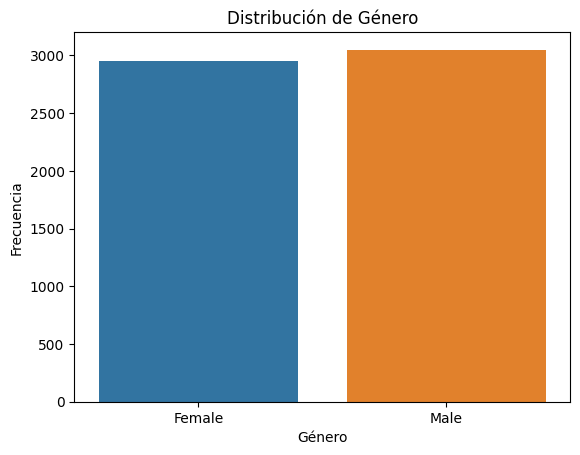

Frecuencia de cada valor en 'gender':
Male      3049
Female    2951
Name: gender, dtype: int64

Porcentaje de cada valor en 'gender':
Male      50.816667
Female    49.183333
Name: gender, dtype: float64


In [ ]:
gender_counts = df['gender'].value_counts()

# Visualizar la frecuencia de cada valor en 'gender' en gráfico de barras
sns.countplot(x='gender', data=df)
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir la frecuencia de cada valor en 'gender'
print("Frecuencia de cada valor en 'gender':")
print(gender_counts)

# Calcular y mostrar el porcentaje de cada valor en 'gender'
gender_percentage = df['gender'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'gender':")
print(gender_percentage)

Con base en la distribución de género en los datos, se observa una relativa paridad entre las categorías "Masculino" y "Femenino", representando aproximadamente el 50.8% y el 49.2% respectivamente. Esta distribución equitativa sugiere un balance relativo en la representación de género dentro de la muestra de datos, lo que podría ser beneficioso para análisis o modelos que requieran una representación proporcional de estas categoría

### **ANÁLISIS UNIVARIADO SENIOR CITIZEN**

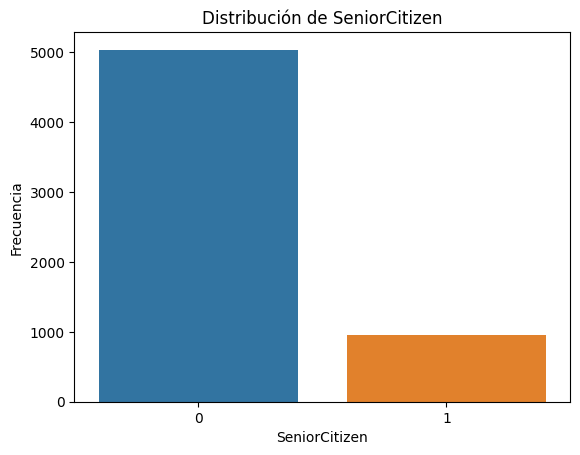

Frecuencia de cada valor en 'SeniorCitizen':
0    5039
1     961
Name: SeniorCitizen, dtype: int64

Porcentaje de cada valor en 'SeniorCitizen':
0    83.983333
1    16.016667
Name: SeniorCitizen, dtype: float64


In [ ]:
senior_counts = df['SeniorCitizen'].value_counts()

# Visualizar la frecuencia de cada valor en 'SeniorCitizen' en un gráfico de barras
sns.countplot(x='SeniorCitizen', data=df)
plt.title('Distribución de SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir la frecuencia de cada valor en 'SeniorCitizen'
print("Frecuencia de cada valor en 'SeniorCitizen':")
print(senior_counts)

# Calcular y mostrar el porcentaje de cada valor en 'SeniorCitizen'
senior_percentage = df['SeniorCitizen'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'SeniorCitizen':")
print(senior_percentage)

La feature 'SeniorCitizen' muestra una disparidad significativa en la frecuencia de sus valores. La categoría '0' representa aproximadamente el 84% de los registros, mientras que la categoría '1' constituye alrededor del 16%. Esta asimetría indica que la mayoría de los registros en este conjunto de datos no pertenecen a la categoría de ciudadanos mayores ('Senior Citizens'), lo que sugiere un desequilibrio considerable en la representación de esta característica. Este desequilibrio podría impactar el rendimiento de modelos predictivos, especialmente aquellos sensibles a desbalances en los datos.

### **ANÁLISIS UNIVARIADO PARTNER**

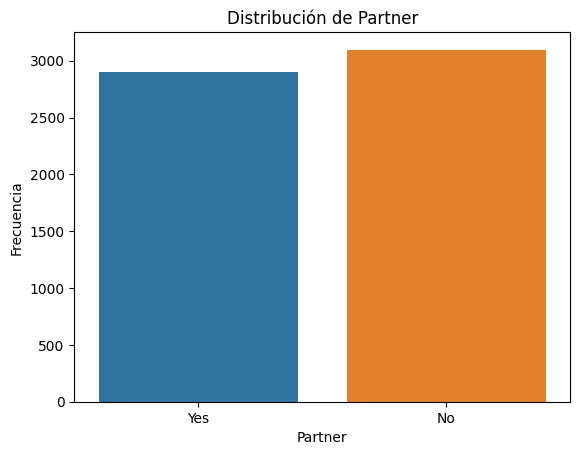

Frecuencia de cada valor en 'Partner':
No     3097
Yes    2903
Name: Partner, dtype: int64

Porcentaje de cada valor en 'Partner':
No     51.616667
Yes    48.383333
Name: Partner, dtype: float64


In [ ]:
partner_counts = df['Partner'].value_counts()

# Visualizar la frecuencia de cada valor en 'Partner' mediante un gráfico de barras
sns.countplot(x='Partner', data=df)
plt.title('Distribución de Partner')
plt.xlabel('Partner')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir la frecuencia de cada valor en 'Partner'
print("Frecuencia de cada valor en 'Partner':")
print(partner_counts)

# Calcular y mostrar el porcentaje de cada valor en 'Partner'
partner_percentage = df['Partner'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'Partner':")
print(partner_percentage)

Esta feature se encuentra distribuida de manera relativamente equitativa entre los valores 'Yes' (Sí) y 'No'. Útil al momento de construir modelos predictivos, ya que no muestra un sesgo marcado hacia ninguna de las categorías

### **ANÁLISIS UNIVARIADO DEPENDENTS**

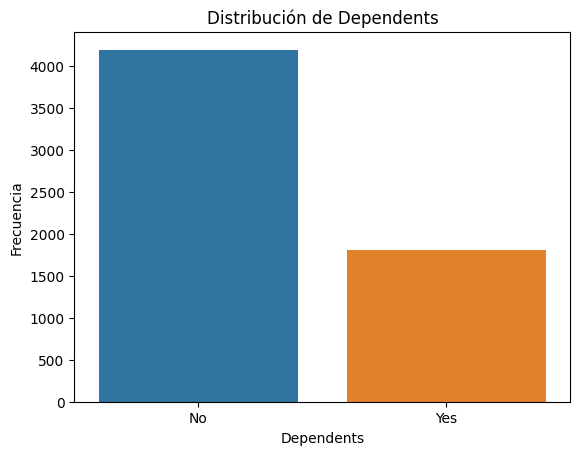

Frecuencia de cada valor en 'Dependents':
No     4189
Yes    1811
Name: Dependents, dtype: int64

Porcentaje de cada valor en 'Dependents':
No     69.816667
Yes    30.183333
Name: Dependents, dtype: float64


In [ ]:
# Contar la frecuencia de cada valor en 'Dependents'
dependents_counts = df['Dependents'].value_counts()

# Visualizar la frecuencia de cada valor en 'Dependents' mediante un gráfico de barras
sns.countplot(x='Dependents', data=df)
plt.title('Distribución de Dependents')
plt.xlabel('Dependents')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir la frecuencia de cada valor en 'Dependents'
print("Frecuencia de cada valor en 'Dependents':")
print(dependents_counts)

# Calcular y mostrar el porcentaje de cada valor en 'Dependents'
dependents_percentage = df['Dependents'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'Dependents':")
print(dependents_percentage)

La variable 'Dependents', que describe si el cliente tiene dependientes o no, muestra una distribución desigual. Aproximadamente el 70% de los clientes no tienen dependientes, mientras que solo alrededor del 30% sí los tienen.

### **ANÁLISIS UNIVARIADO TENURE**

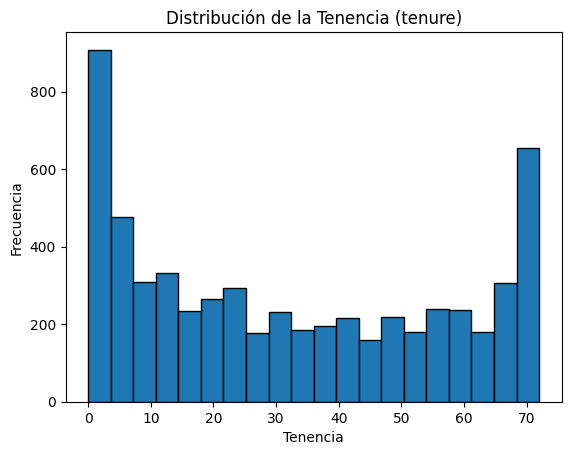

In [ ]:
# Distribución
plt.hist(df['tenure'], bins=20, edgecolor='black')
plt.title('Distribución de la Tenencia (tenure)')
plt.xlabel('Tenencia')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Medidas
mean_tenure = df['tenure'].mean()
median_tenure = df['tenure'].median()
min_tenure = df['tenure'].min()
max_tenure = df['tenure'].max()
std_dev_tenure = df['tenure'].std()

print(f"Media de la Tenencia: {mean_tenure}")
print(f"Mediana de la Tenencia: {median_tenure}")
print(f"Mínimo de la Tenencia: {min_tenure}")
print(f"Máximo de la Tenencia: {max_tenure}")
print(f"Desviación Estándar de la Tenencia: {std_dev_tenure}")

Media de la Tenencia: 32.32066666666667
Mediana de la Tenencia: 29.0
Mínimo de la Tenencia: 0
Máximo de la Tenencia: 72
Desviación Estándar de la Tenencia: 24.63729569058625


Con base en los anteriores resultados se peude mencionar que la tenencia media de clientes es de aproximadamente 32 meses, con una mediana de 29 meses. Esto sugiere que la mitad de los clientes ha estado por menos de 29 meses con el servicio. La variación en los períodos de tenencia es notable, ya que la desviación estándar es alrededor de 24.64, indicando una dispersión significativa alrededor de la media.

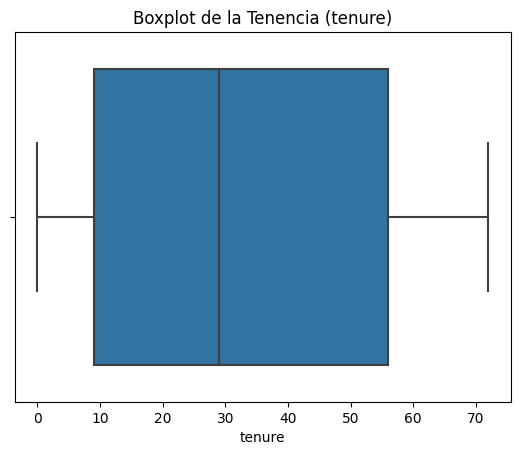

In [ ]:
# Boxplot Tenure
import seaborn as sns

sns.boxplot(x=df['tenure'])
plt.title('Boxplot de la Tenencia (tenure)')
plt.show()

In [ ]:
# Calculando IQR

q1 = df['tenure'].quantile(0.25)  # Primer cuartil (25%)
q3 = df['tenure'].quantile(0.75)  # Tercer cuartil (75%)

# Calculando el rango intercuartílico
IQR = q3 - q1
print("Rango intercuartílico (IQR) de 'tenure':", IQR)

Rango intercuartílico (IQR) de 'tenure': 47.0


Dado que el IQR es 47 y la tenencia varía desde 0 hasta 72, el IQR cubre una parte significativa del rango total. La mediana (29) está más cerca del primer cuartil que del tercer cuartil, lo que sugiere que la distribución podría estar sesgada hacia valores más bajos de tenencia. Además, la desviación estándar (24.64) indica que los datos pueden estar relativamente dispersos alrededor de la media.

### **ANÁLISIS UNIVARIADO PHONESERVICE**

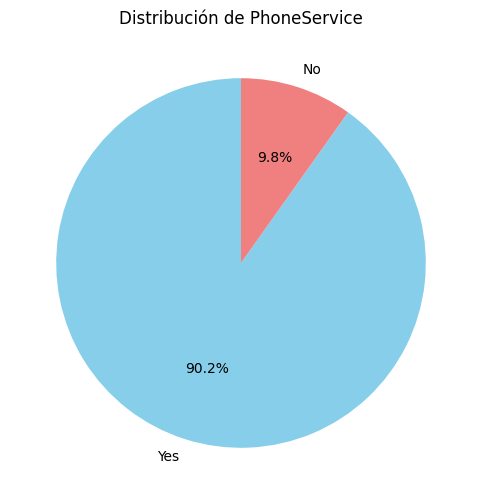

Frecuencia de cada valor en 'PhoneService':
Yes    5410
No      590
Name: PhoneService, dtype: int64

Porcentaje de cada valor en 'PhoneService':
Yes    90.166667
No      9.833333
Name: PhoneService, dtype: float64


In [ ]:
# Contar la frecuencia de cada valor en 'PhoneService'
phone_service_counts = df['PhoneService'].value_counts()

# Visualizar la distribución de 'PhoneService' en un gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(phone_service_counts, labels=phone_service_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribución de PhoneService')
plt.show()

# Imprimir la frecuencia de cada valor en 'PhoneService'
print("Frecuencia de cada valor en 'PhoneService':")
print(phone_service_counts)

# Calcular y mostrar el porcentaje de cada valor en 'PhoneService'
phone_service_percentage = df['PhoneService'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'PhoneService':")
print(phone_service_percentage)

Los datos muestran que aproximadamente el 90.17% de los clientes tienen servicio telefónico ('Yes'), mientras que solo alrededor del 9.83% no lo tienen ('No'). Esta distribución sugiere una alta prevalencia de clientes con servicio telefónico en comparación con aquellos que no lo tienen en este conjunto de datos.

### **ANÁLISIS UNIVARIADO MULTIPLELINES**

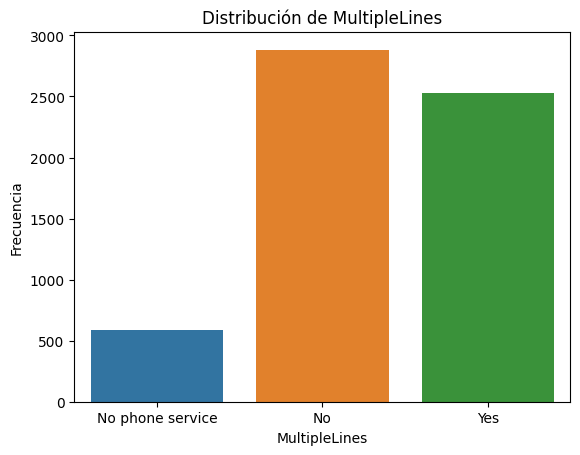

Frecuencia de cada valor en 'MultipleLines':
No                  2883
Yes                 2527
No phone service     590
Name: MultipleLines, dtype: int64

Porcentaje de cada valor en 'MultipleLines':
No                  48.050000
Yes                 42.116667
No phone service     9.833333
Name: MultipleLines, dtype: float64


In [ ]:
# Contar la frecuencia de cada valor en 'MultipleLines'
multiple_lines_counts = df['MultipleLines'].value_counts()

# Visualizar la frecuencia de cada valor en 'MultipleLines' en un gráfico de barras
sns.countplot(x='MultipleLines', data=df)
plt.title('Distribución de MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir la frecuencia de cada valor en 'MultipleLines'
print("Frecuencia de cada valor en 'MultipleLines':")
print(multiple_lines_counts)

# Calcular y mostrar el porcentaje de cada valor en 'MultipleLines'
multiple_lines_percentage = df['MultipleLines'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'MultipleLines':")
print(multiple_lines_percentage)

Aproximadamente el 48.05% de los clientes no tienen múltiples líneas, mientras que alrededor del 42.12% tienen este servicio. Además, un pequeño porcentaje, alrededor del 9.83%, tiene servicio telefónico pero no tiene múltiples líneas. Esta distribución muestra una división relativamente equitativa entre aquellos con y sin múltiples líneas, con una minoría que tiene servicio telefónico sin acceso a múltiples líneas.

### **ANÁLISIS UNIVARIADO INTERNETSERVICE**

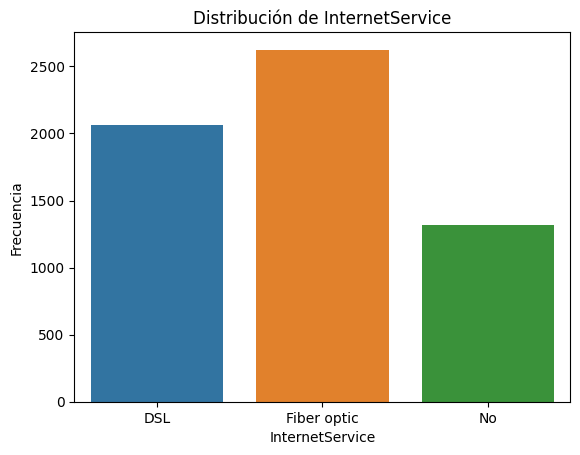

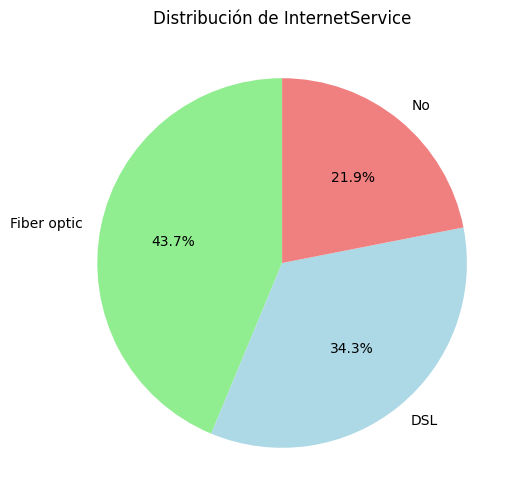

Frecuencia de cada valor en 'InternetService':
Fiber optic    2624
DSL            2061
No             1315
Name: InternetService, dtype: int64

Porcentaje de cada valor en 'InternetService':
Fiber optic    43.733333
DSL            34.350000
No             21.916667
Name: InternetService, dtype: float64


In [ ]:
# Frecuencia de cada valor en 'InternetService'
internet_service_counts = df['InternetService'].value_counts()

# Visualizar la frecuencia de cada valor en 'InternetService' en un gráfico de barras
sns.countplot(x='InternetService', data=df)
plt.title('Distribución de InternetService')
plt.xlabel('InternetService')
plt.ylabel('Frecuencia')
plt.show()

# Visualizar la distribución de 'InternetService' en un gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(internet_service_counts, labels=internet_service_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightblue', 'lightcoral'])
plt.title('Distribución de InternetService')
plt.show()

# Imprimir la frecuencia de cada valor en 'InternetService'
print("Frecuencia de cada valor en 'InternetService':")
print(internet_service_counts)

# Calcular y mostrar el porcentaje de cada valor en 'InternetService'
internet_service_percentage = df['InternetService'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'InternetService':")
print(internet_service_percentage)

Alrededor del 43.73% de los clientes tienen servicio de fibra óptica, seguido por aproximadamente el 34.35% que utiliza DSL. Por otro lado, un 21.92% de los clientes no tienen servicio de Internet. Esta distribución refleja una preferencia mayoritaria por la fibra óptica, seguida por DSL, con una parte significativa de clientes sin servicio de Internet.

### **ANÁLISIS UNIVARIADO ONLINESECURITY**

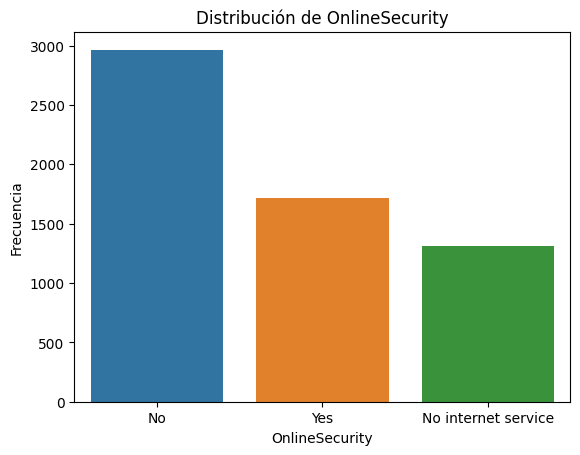

Frecuencia de cada valor en 'OnlineSecurity':
No                     2965
Yes                    1720
No internet service    1315
Name: OnlineSecurity, dtype: int64

Porcentaje de cada valor en 'OnlineSecurity':
No                     49.416667
Yes                    28.666667
No internet service    21.916667
Name: OnlineSecurity, dtype: float64


In [ ]:
# frecuencia de cada valor en 'OnlineSecurity'
online_security_counts = df['OnlineSecurity'].value_counts()

# Visualizar la frecuencia de cada valor en 'OnlineSecurity' en un gráfico de barras
sns.countplot(x='OnlineSecurity', data=df)
plt.title('Distribución de OnlineSecurity')
plt.xlabel('OnlineSecurity')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir la frecuencia de cada valor en 'OnlineSecurity'
print("Frecuencia de cada valor en 'OnlineSecurity':")
print(online_security_counts)

# Calcular y mostrar el porcentaje de cada valor en 'OnlineSecurity'
online_security_percentage = df['OnlineSecurity'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'OnlineSecurity':")
print(online_security_percentage)

La mayoría de los clientes, aproximadamente el 49.42%, no tienen servicio de seguridad en línea, seguidos por alrededor del 28.67% que sí cuentan con este servicio. Además, un 21.92% no tienen servicio de internet. Esto indica una proporción considerable de usuarios que carecen tanto de seguridad en línea como de servicio de internet.

### **ANÁLISIS UNIVARIADO ONLINEBACKUP**

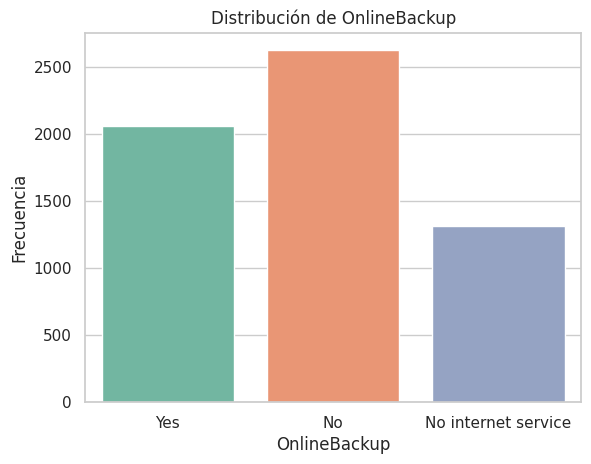

Frecuencia de cada valor en 'OnlineBackup':
No                     2623
Yes                    2062
No internet service    1315
Name: OnlineBackup, dtype: int64

Porcentaje de cada valor en 'OnlineBackup':
No                     43.716667
Yes                    34.366667
No internet service    21.916667
Name: OnlineBackup, dtype: float64


In [ ]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Contar la frecuencia de cada valor en 'OnlineBackup'
online_backup_counts = df['OnlineBackup'].value_counts()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Visualizar la frecuencia de cada valor en 'OnlineBackup' en un gráfico de barras
sns.countplot(x='OnlineBackup', data=df, palette=colors)
plt.title('Distribución de OnlineBackup')
plt.xlabel('OnlineBackup')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir la frecuencia de cada valor en 'OnlineBackup'
print("Frecuencia de cada valor en 'OnlineBackup':")
print(online_backup_counts)

# Calcular y mostrar el porcentaje de cada valor en 'OnlineBackup'
online_backup_percentage = df['OnlineBackup'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'OnlineBackup':")
print(online_backup_percentage)

Aproximadamente el 43.72% de los clientes no tienen servicio de respaldo en línea, mientras que alrededor del 34.37% sí lo tienen. También se observa que un 21.92% no tienen servicio de internet, lo que sigue indicando una proporción significativa de usuarios sin acceso a ciertos servicios en línea.

### **ANÁLISIS UNIVARIADO DEVICEPROTECTION**

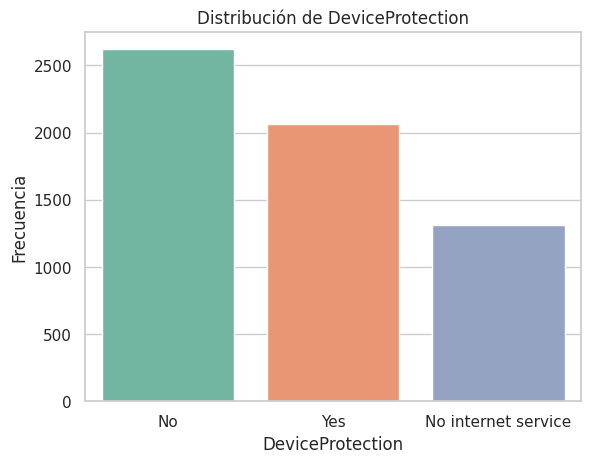

Frecuencia de cada valor en 'DeviceProtection':
No                     2620
Yes                    2065
No internet service    1315
Name: DeviceProtection, dtype: int64

Porcentaje de cada valor en 'DeviceProtection':
No                     43.666667
Yes                    34.416667
No internet service    21.916667
Name: DeviceProtection, dtype: float64


In [ ]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Contar la frecuencia de cada valor en 'DeviceProtection'
device_protection_counts = df['DeviceProtection'].value_counts()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Visualizar la frecuencia de cada valor en 'DeviceProtection' en un gráfico de barras
sns.countplot(x='DeviceProtection', data=df, palette=colors)
plt.title('Distribución de DeviceProtection')
plt.xlabel('DeviceProtection')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir la frecuencia de cada valor en 'DeviceProtection'
print("Frecuencia de cada valor en 'DeviceProtection':")
print(device_protection_counts)

# Calcular y mostrar el porcentaje de cada valor en 'DeviceProtection'
device_protection_percentage = df['DeviceProtection'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'DeviceProtection':")
print(device_protection_percentage)

Alrededor del 43.67% de los clientes no tienen protección de dispositivo, mientras que aproximadamente el 34.42% sí cuentan con este servicio. Se mantiene un patrón similar al observar que alrededor del 21.92% de los clientes no disponen de servicio de internet.

### **ANÁLISIS UNIVARIADO TECHSUPPORT**

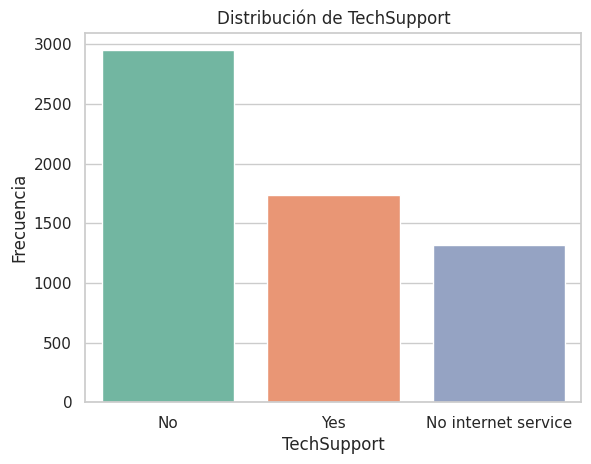

Frecuencia de cada valor en 'TechSupport':
No                     2950
Yes                    1735
No internet service    1315
Name: TechSupport, dtype: int64

Porcentaje de cada valor en 'TechSupport':
No                     49.166667
Yes                    28.916667
No internet service    21.916667
Name: TechSupport, dtype: float64


In [ ]:
# Colores personalizados para el gráfico
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Contar la frecuencia de cada valor en 'TechSupport'
tech_support_counts = df['TechSupport'].value_counts()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Visualizar la frecuencia de cada valor en 'TechSupport' en un gráfico de barras
sns.countplot(x='TechSupport', data=df, palette=colors)
plt.title('Distribución de TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir la frecuencia de cada valor en 'TechSupport'
print("Frecuencia de cada valor en 'TechSupport':")
print(tech_support_counts)

# Calcular y mostrar el porcentaje de cada valor en 'TechSupport'
tech_support_percentage = df['TechSupport'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'TechSupport':")
print(tech_support_percentage)

Los resultados muestran que alrededor de la mitad de los usuarios no tienen soporte técnico, seguido por un poco menos de un tercio que sí tiene acceso a este servicio. Un porcentaje similar no cuenta con servicio de internet, lo que sugiere que una parte significativa de los clientes no dispone de este tipo de asistencia o de conexión a internet.

### **ANÁLISIS UNIVARIADO STREAMINGTV**

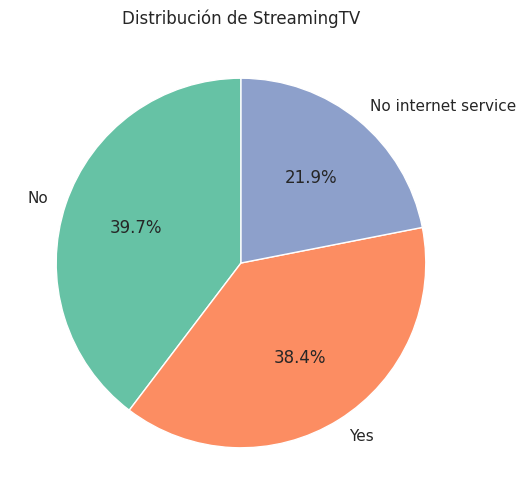

Frecuencia de cada valor en 'StreamingTV':
No                     2380
Yes                    2305
No internet service    1315
Name: StreamingTV, dtype: int64

Porcentaje de cada valor en 'StreamingTV':
No                     39.666667
Yes                    38.416667
No internet service    21.916667
Name: StreamingTV, dtype: float64


In [ ]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Contar la frecuencia de cada valor en 'StreamingTV'
streaming_tv_counts = df['StreamingTV'].value_counts()

# Visualizar la distribución de 'StreamingTV' en un gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(streaming_tv_counts, labels=streaming_tv_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución de StreamingTV')
plt.show()

# Imprimir la frecuencia de cada valor en 'StreamingTV'
print("Frecuencia de cada valor en 'StreamingTV':")
print(streaming_tv_counts)

# Calcular y mostrar el porcentaje de cada valor en 'StreamingTV'
streaming_tv_percentage = df['StreamingTV'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'StreamingTV':")
print(streaming_tv_percentage)


Los resultados indican que la distribución entre los usuarios que tienen y los que no tienen servicio de streaming de TV está casi equilibrada. Además, una proporción considerable de los clientes no cuenta con servicio de internet, lo que podría impactar en su acceso a esta funcionalidad.

### **ANÁLISIS UNIVARIADO STREAMINGMOVIES**

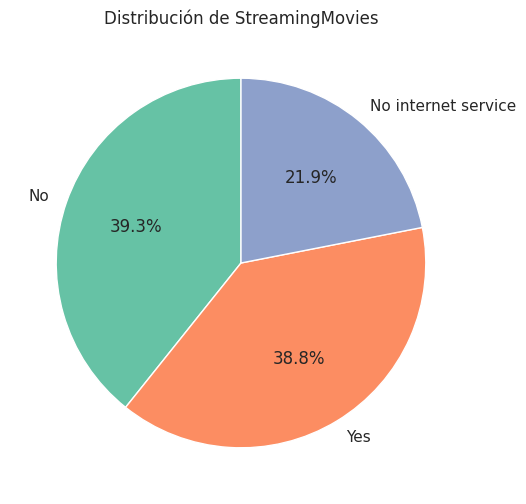

Frecuencia de cada valor en 'StreamingMovies':
No                     2356
Yes                    2329
No internet service    1315
Name: StreamingMovies, dtype: int64

Porcentaje de cada valor en 'StreamingMovies':
No                     39.266667
Yes                    38.816667
No internet service    21.916667
Name: StreamingMovies, dtype: float64


In [ ]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Contar la frecuencia de cada valor en 'StreamingMovies'
streaming_movies_counts = df['StreamingMovies'].value_counts()

# Visualizar la distribución de 'StreamingMovies' en un gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(streaming_movies_counts, labels=streaming_movies_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución de StreamingMovies')
plt.show()

# Imprimir la frecuencia de cada valor en 'StreamingMovies'
print("Frecuencia de cada valor en 'StreamingMovies':")
print(streaming_movies_counts)

# Calcular y mostrar el porcentaje de cada valor en 'StreamingMovies'
streaming_movies_percentage = df['StreamingMovies'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'StreamingMovies':")
print(streaming_movies_percentage)

La distribución de clientes con y sin servicio de streaming de películas es casi equitativa, con alrededor del 39% que sí tienen acceso, otro 39% que no, y aproximadamente el 22% que carece de acceso a internet, lo que limita su uso de este servicio.

### **ANÁLISIS UNIVARIADO CONTRACT**

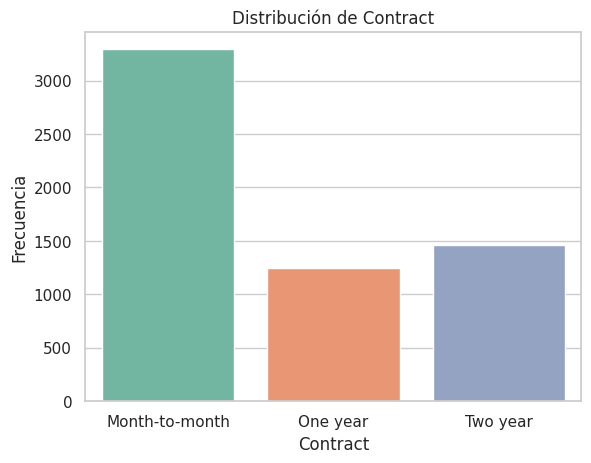

Frecuencia de cada valor en 'Contract':
Month-to-month    3293
Two year          1459
One year          1248
Name: Contract, dtype: int64

Porcentaje de cada valor en 'Contract':
Month-to-month    54.883333
Two year          24.316667
One year          20.800000
Name: Contract, dtype: float64


In [ ]:
contract_order = ['Month-to-month', 'One year', 'Two year']
df['Contract'] = pd.Categorical(df['Contract'], categories=contract_order, ordered=True)

# Colores personalizados para el gráfico de barras
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Visualizar la frecuencia de cada valor en 'Contract' en un gráfico de barras ordenado
sns.countplot(x='Contract', data=df, palette=colors, order=contract_order)
plt.title('Distribución de Contract')
plt.xlabel('Contract')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir la frecuencia de cada valor en 'Contract'
contract_counts = df['Contract'].value_counts()
print("Frecuencia de cada valor en 'Contract':")
print(contract_counts)

# Calcular y mostrar el porcentaje de cada valor en 'Contract'
contract_percentage = df['Contract'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'Contract':")
print(contract_percentage)

La mayoría de los contratos son de tipo 'Month-to-month', representando alrededor del 54.88% de los datos, seguidos por 'Two year' y 'One year' con proporciones del 24.32% y 20.80% respectivamente.

### **ANÁLISIS UNIVARIADO PAPERLESSBILLING**

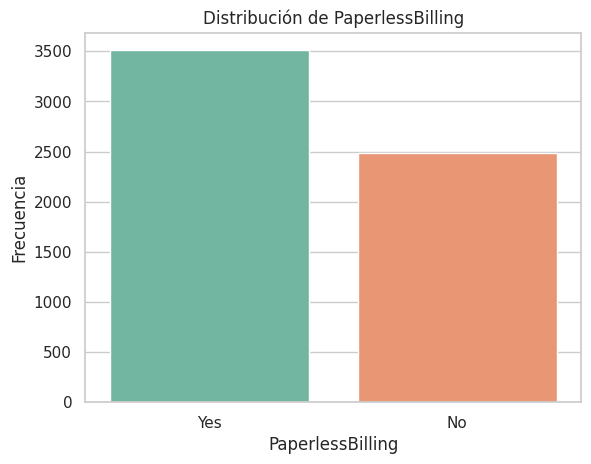

Frecuencia de cada valor en 'PaperlessBilling':
Yes    3510
No     2490
Name: PaperlessBilling, dtype: int64

Porcentaje de cada valor en 'PaperlessBilling':
Yes    58.5
No     41.5
Name: PaperlessBilling, dtype: float64


In [ ]:
sns.set(style="whitegrid")

# Visualizar la frecuencia de cada valor en 'PaperlessBilling' en un gráfico de barras
sns.countplot(x='PaperlessBilling', data=df, palette=colors)
plt.title('Distribución de PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir la frecuencia de cada valor en 'PaperlessBilling'
paperless_billing_counts = df['PaperlessBilling'].value_counts()
print("Frecuencia de cada valor en 'PaperlessBilling':")
print(paperless_billing_counts)

# Calcular y mostrar el porcentaje de cada valor en 'PaperlessBilling'
paperless_billing_percentage = df['PaperlessBilling'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'PaperlessBilling':")
print(paperless_billing_percentage)

Alrededor del 58.5% de los clientes tienen facturación electrónica ('PaperlessBilling' es 'Yes'), mientras que aproximadamente el 41.5% de los clientes no prefieren este método y optan por facturación en papel ('PaperlessBilling' es 'No').

### **ANÁLISIS UNIVARIADO PAYMENTMETHOD**

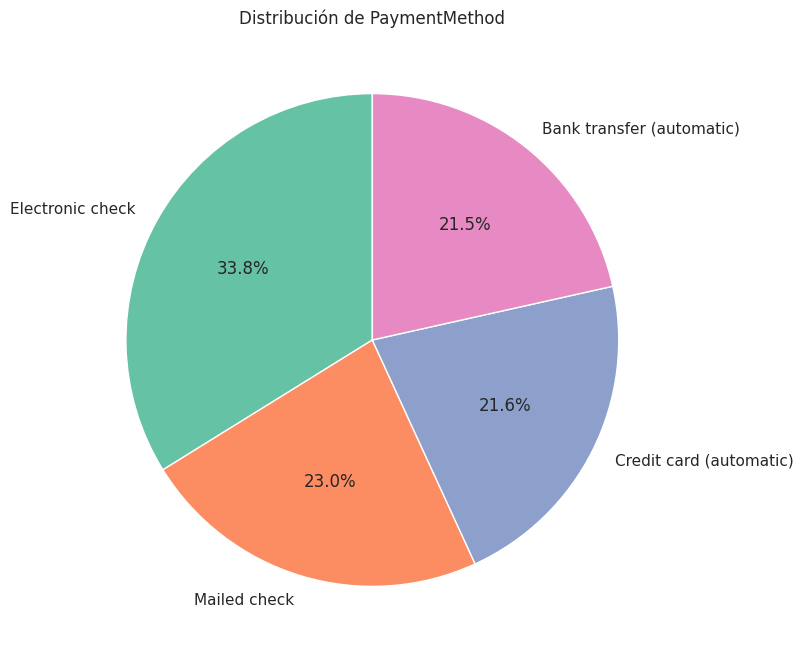

Frecuencia de cada valor en 'PaymentMethod':
Electronic check             2030
Mailed check                 1381
Credit card (automatic)      1299
Bank transfer (automatic)    1290
Name: PaymentMethod, dtype: int64

Porcentaje de cada valor en 'PaymentMethod':
Electronic check             33.833333
Mailed check                 23.016667
Credit card (automatic)      21.650000
Bank transfer (automatic)    21.500000
Name: PaymentMethod, dtype: float64


In [ ]:
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']

# Contar la frecuencia de cada valor en 'PaymentMethod'
payment_method_counts = df['PaymentMethod'].value_counts()

# Visualizar la distribución de 'PaymentMethod' en un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribución de PaymentMethod')
plt.show()

# Imprimir la frecuencia de cada valor en 'PaymentMethod'
print("Frecuencia de cada valor en 'PaymentMethod':")
print(payment_method_counts)

# Calcular y mostrar el porcentaje de cada valor en 'PaymentMethod'
payment_method_percentage = df['PaymentMethod'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'PaymentMethod':")
print(payment_method_percentage)

La forma más común de pago es mediante cheque electrónico, con aproximadamente un 34% de los clientes utilizando este método. Los cheques enviados por correo y los pagos automáticos con tarjeta de crédito o transferencia bancaria tienen una distribución más equitativa, rondando el 23% al 22%.

### **ANÁLISIS UNIVARIADO MONTHLYCHARGES**

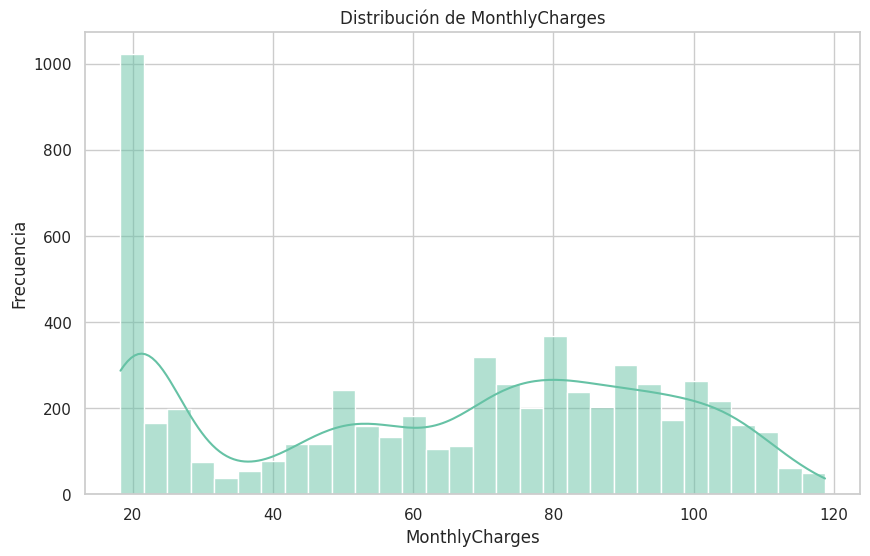

Estadísticas descriptivas de 'MonthlyCharges':
count    6000.000000
mean       64.607233
std        30.195382
min        18.250000
25%        35.000000
50%        70.300000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64


In [ ]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Visualizar la distribución de 'MonthlyCharges' en un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='#66c2a5')
plt.title('Distribución de MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir estadísticas descriptivas de 'MonthlyCharges'
print("Estadísticas descriptivas de 'MonthlyCharges':")
print(df['MonthlyCharges'].describe())

Las estadísticas de las tarifas mensuales reflejan una amplia variabilidad en los precios entre 18.25 y 118.75. La tarifa media se sitúa en aproximadamente 64.60, con una desviación estándar significativa de alrededor de 30.20, lo que indica una dispersión relativamente alta de los valores con respecto a la media. El 25 de los clientes paga menos de 35 al mes, mientras que el 75 paga menos de 89.85. Esta diversidad en los precios sugiere la presencia de distintos planes tarifarios adaptados a las necesidades y preferencias de los clientes.

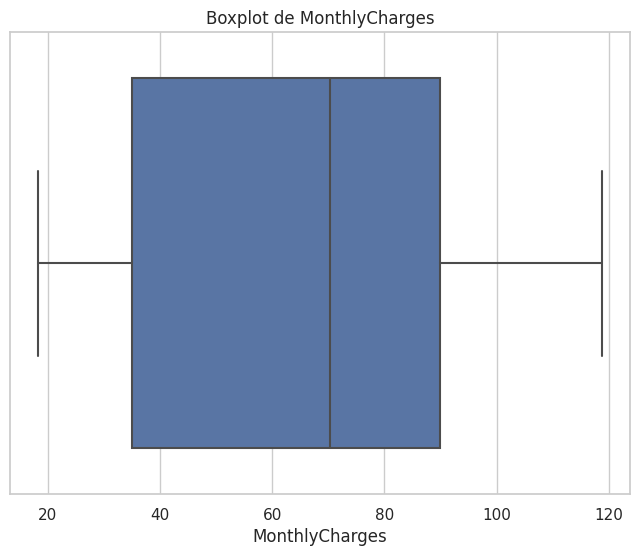

In [ ]:
# Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot para MonthlyCharges
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Boxplot de MonthlyCharges')
plt.show()

### **ANÁLISIS UNIVARIADO TOTALCHARGES**

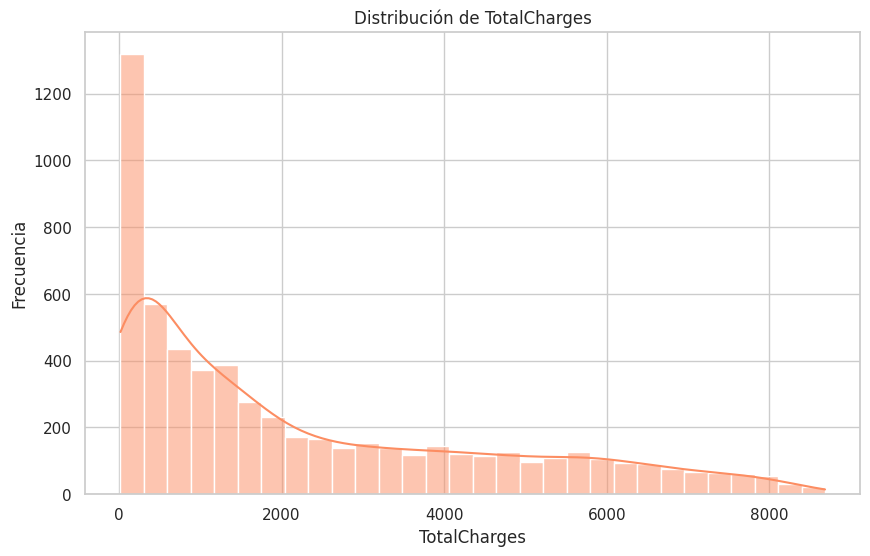

Estadísticas descriptivas de 'TotalCharges':
count    5990.000000
mean     2281.988155
std      2274.401428
min        18.800000
25%       389.337500
50%      1391.950000
75%      3803.725000
max      8684.800000
Name: TotalCharges, dtype: float64


In [ ]:
# Convertir 'TotalCharges' a tipo numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Visualizar la distribución de 'TotalCharges' en un histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalCharges'], bins=30, kde=True, color='#fc8d62')
plt.title('Distribución de TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir estadísticas descriptivas de 'TotalCharges'
print("Estadísticas descriptivas de 'TotalCharges':")
print(df['TotalCharges'].describe())

Las estadísticas de los montos totales pagados reflejan una amplia variabilidad en los valores, desde 18.80 hasta 8684.80, con una media de aproximadamente 2281.99 y una desviación estándar de 2274.40. El 0.25 de los clientes ha pagado menos de 389.34 en total, mientras que el 0.75 ha abonado menos de 3803.La mediana, que es de 1391.95, es considerablemente menor que la media, lo que sugiere una posible presencia de valores extremadamente altos que están incrementando la media. Esta variabilidad podría estar relacionada con distintos tipos de servicios o contratos que los clientes han adquirido.

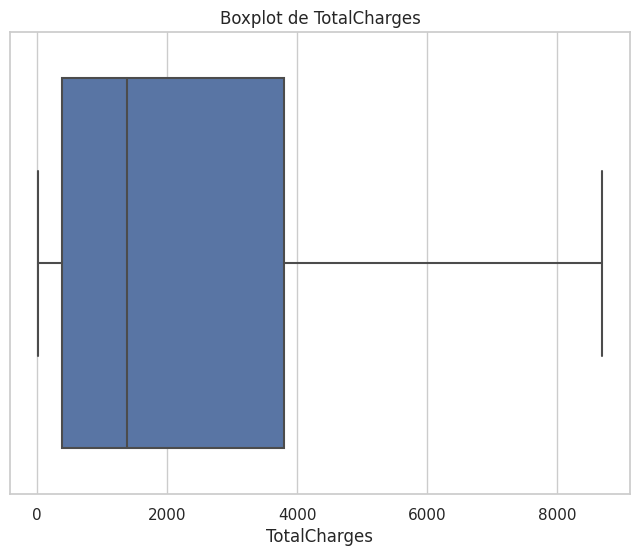

In [ ]:
# Crear un boxplot para TotalCharges
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['TotalCharges'])
plt.title('Boxplot de TotalCharges')
plt.show()

### **ANÁLISIS UNIVARIADO CHURN**

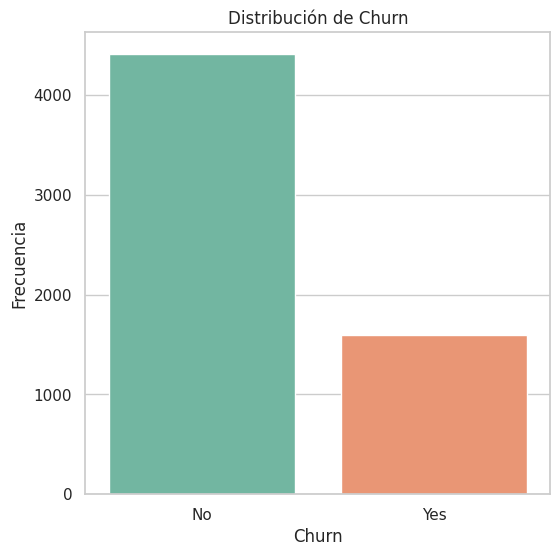

Frecuencia de cada valor en 'Churn':
No     4408
Yes    1592
Name: Churn, dtype: int64

Porcentaje de cada valor en 'Churn':
No     73.466667
Yes    26.533333
Name: Churn, dtype: float64


In [ ]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Visualizar la proporción de 'Churn' en un gráfico de barras
plt.figure(figsize=(6, 6))
sns.countplot(x='Churn', data=df, palette=['#66c2a5', '#fc8d62'])
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir la frecuencia de cada valor en 'Churn'
churn_counts = df['Churn'].value_counts()
print("Frecuencia de cada valor en 'Churn':")
print(churn_counts)

# Calcular y mostrar el porcentaje de cada valor en 'Churn'
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print("\nPorcentaje de cada valor en 'Churn':")
print(churn_percentage)


Los datos de abandono ('Churn') muestran que aproximadamente el 26.53% de los clientes abandonaron el servicio, mientras que el 73.47% permanecieron con la compañía. Esta tasa de abandono es significativa y merece una atención especial, ya que podría indicar áreas problemáticas o motivos para la insatisfacción del cliente que necesitan ser abordados para retener a los usuarios.

### <font color='blue'>**ANÁLISIS MULTIVARIADO**</font>

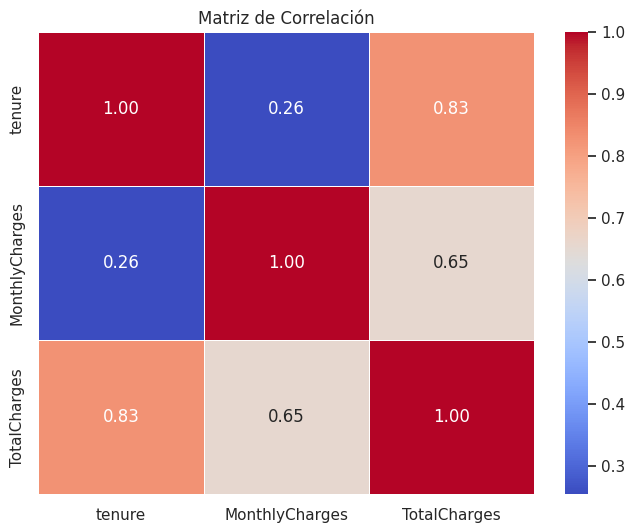

In [ ]:
# Seleccionar solo las variables numéricas para la matriz de correlación
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
numeric_data = df[numeric_columns]

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

La anterior matriz muestra una correlación positiva moderada entre "tenure" (tenencia) y "MonthlyCharges" (cargos mensuales), con un valor de aproximadamente 0.26. Esta correlación indica que a medida que la tenencia aumenta, los cargos mensuales tienden a incrementarse también, aunque la relación no es muy fuerte.

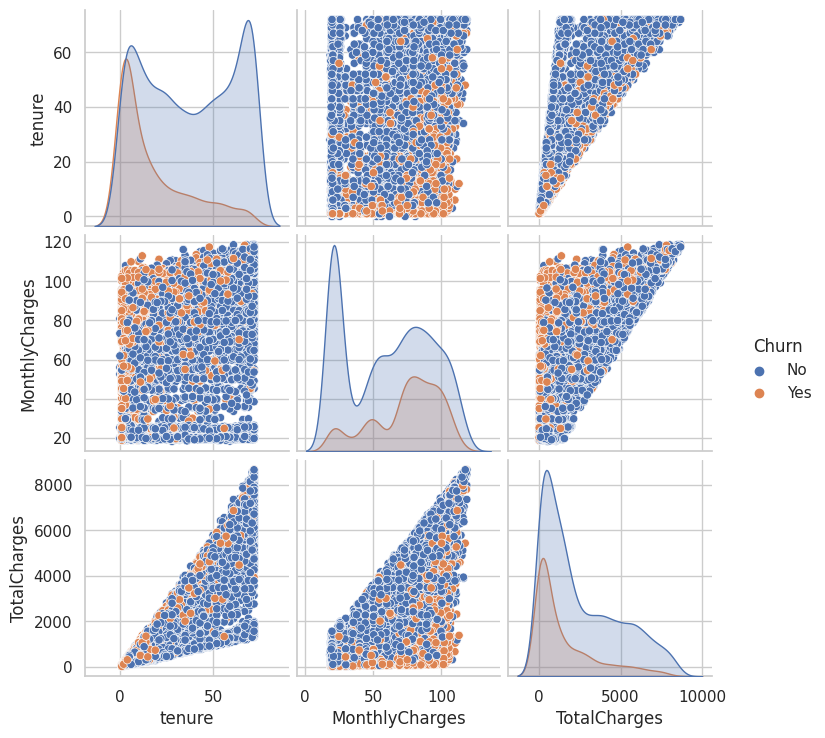

In [ ]:
# Pairplot
# Visualizar relaciones entre pares de variables numéricas. Identificar patrones y posibles correlaciones.
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', diag_kind='kde')
plt.show()

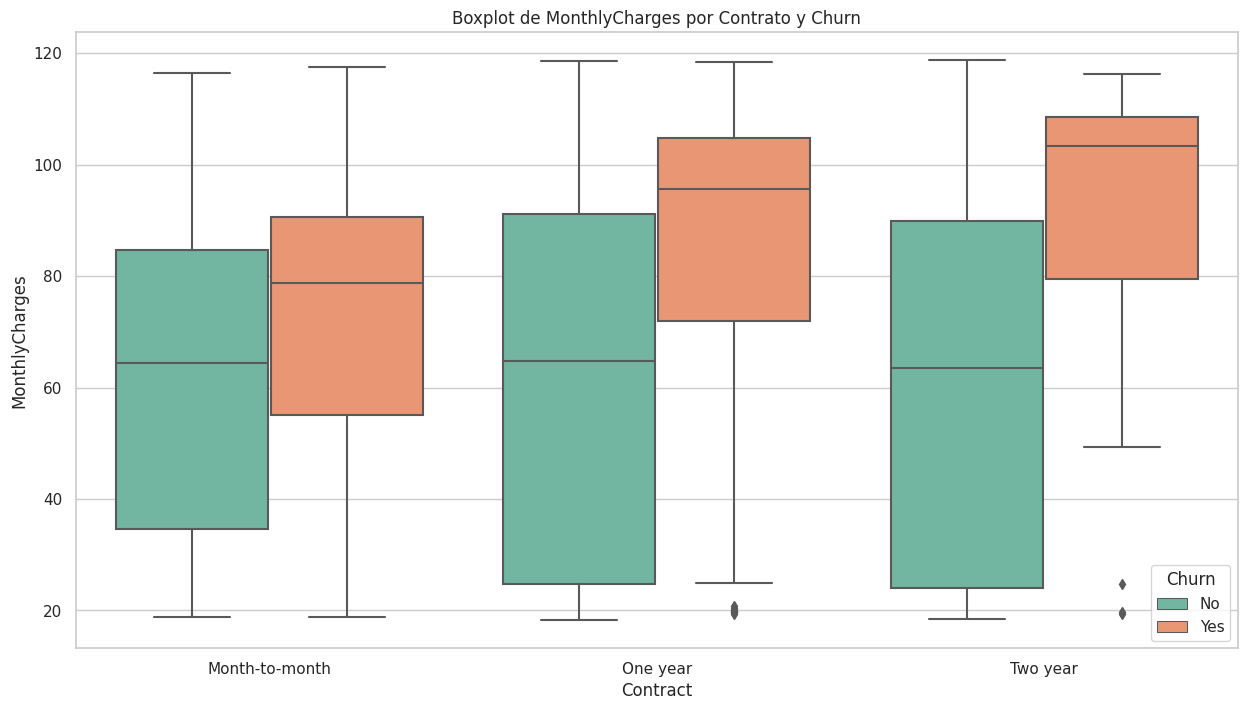

In [ ]:
# Análisis de Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df, palette='Set2')
plt.title('Boxplot de MonthlyCharges por Contrato y Churn')
plt.show()

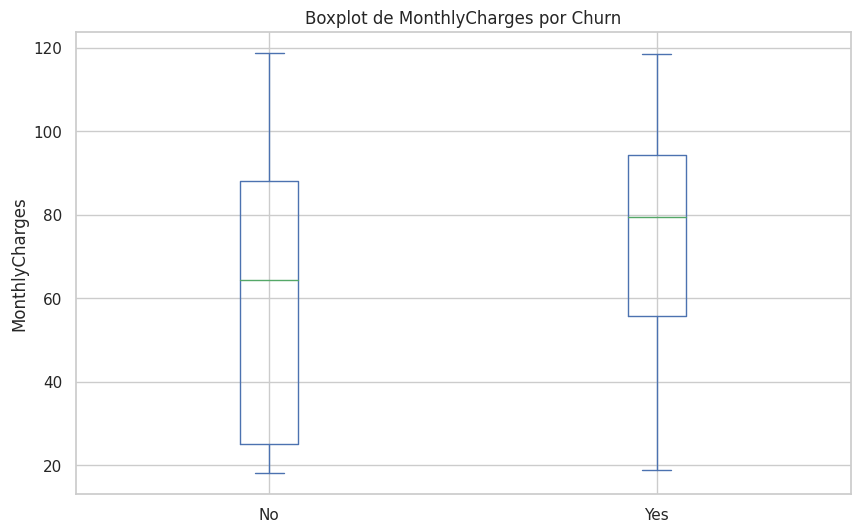

In [ ]:
boxplot_data = df.pivot(columns='Churn', values='MonthlyCharges')
boxplot_data.plot(kind='box', figsize=(10, 6))
plt.title('Boxplot de MonthlyCharges por Churn')
plt.ylabel('MonthlyCharges')
plt.show()


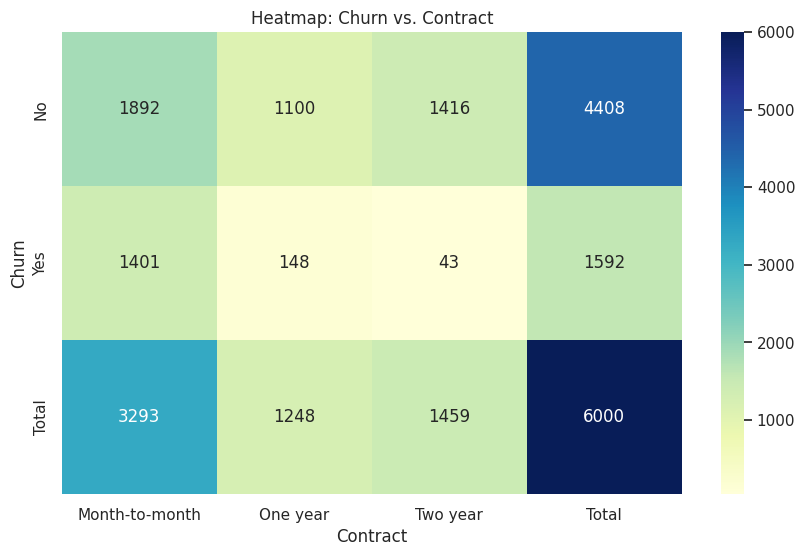

In [ ]:
# Análisis de frecuencia Cruzada - Examinar relaciones entre variables categóricas
cross_tab = pd.crosstab(df['Churn'], df['Contract'], margins=True, margins_name="Total")
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt='g', cbar=True)
plt.title("Heatmap: Churn vs. Contract")
plt.show()

In [ ]:
cross_tab = pd.crosstab(df['Churn'], df['Contract'], margins=True, margins_name="Total")
print(cross_tab)

Contract  Month-to-month  One year  Two year  Total
Churn                                              
No                  1892      1100      1416   4408
Yes                 1401       148        43   1592
Total               3293      1248      1459   6000


 La tabla de frecuencia cruzada refleja la distribución de los clientes según el tipo de contrato ('Month-to-month', 'One year', 'Two year') y su relación con la tasa de abandono ('Churn'). Se observan los siguientes escenarios:

Contrato tipo 'Month-to-month' vs. Tasa de Churn: Los clientes con contratos 'Month-to-month' representan la mayoría de los clientes (55% del total), pero también muestran la tasa más alta de abandono (alrededor del 42%).

Contratos a largo plazo vs. Tasa de Churn: Los contratos a largo plazo ('One year' y 'Two year') representan una proporción menor de clientes (alrededor del 41% del total), pero muestran tasas de abandono significativamente más bajas (alrededor del 3% y 1.5% respectivamente).

Relación entre duración del contrato y Churn: Hay una correlación entre la duración del contrato y la probabilidad de abandono. Los clientes con contratos más largos tienen menos probabilidades de abandonar el servicio.

Los contratos a corto plazo ('Month-to-month') parecen estar asociados con una tasa de abandono más alta en comparación con los contratos a largo plazo, lo que extrae el insight de que la duración del contrato puede influir en la retención de clientes.

In [ ]:
# Conversion de "TotalCharges" a tipo númerico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df.dtypes)

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract            category
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object


In [ ]:
# Conversion de "SeniorCitizen" a tipo object

print("Tipo de datos antes del cambio:")
print(df['SeniorCitizen'].dtype)
# Cambia el tipo de datos a object
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')
# Verifica el tipo de datos después del cambio
print("\nTipo de datos después del cambio:")
print(df['SeniorCitizen'].dtype)

Tipo de datos antes del cambio:
int64

Tipo de datos después del cambio:
object


In [ ]:
print(df.dtypes)

customerID            object
gender                object
SeniorCitizen         object
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract            category
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object


In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,6000.000000,6000.000000,5990.000000
mean,32.320667,64.607233,2281.988155
std,24.637296,30.195382,2274.401428
min,0.000000,18.250000,18.800000
25%,9.000000,35.000000,389.337500
50%,29.000000,70.300000,1391.950000
75%,56.000000,89.850000,3803.725000
max,72.000000,118.750000,8684.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        6000 non-null   object  
 1   gender            6000 non-null   object  
 2   SeniorCitizen     6000 non-null   object  
 3   Partner           6000 non-null   object  
 4   Dependents        6000 non-null   object  
 5   tenure            6000 non-null   int64   
 6   PhoneService      6000 non-null   object  
 7   MultipleLines     6000 non-null   object  
 8   InternetService   6000 non-null   object  
 9   OnlineSecurity    6000 non-null   object  
 10  OnlineBackup      6000 non-null   object  
 11  DeviceProtection  6000 non-null   object  
 12  TechSupport       6000 non-null   object  
 13  StreamingTV       6000 non-null   object  
 14  StreamingMovies   6000 non-null   object  
 15  Contract          6000 non-null   category
 16  PaperlessBilling  6000 n

In [ ]:
# Validación valores Nulos
import pandas as pd
df = pd.DataFrame(df)
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print("Columnas con valores nulos:")
print(columns_with_nulls)
total_nulls = null_counts.sum()
print("\nCantidad total de valores nulos en el DataFrame:", total_nulls)

Columnas con valores nulos:
TotalCharges    10
dtype: int64

Cantidad total de valores nulos en el DataFrame: 10


In [ ]:
# Filas con valores nulos
rows_with_nulls = df[df.isnull().any(axis=1)]

# Muestra la información de las filas con valores nulos
print("Información de las filas con valores nulos:")
print(rows_with_nulls)

Información de las filas con valores nulos:
      customerID  gender SeniorCitizen Partner Dependents  tenure  \
288   4472-LVYGI  Female             0     Yes        Yes       0   
553   3115-CZMZD    Male             0      No        Yes       0   
736   5709-LVOEQ  Female             0     Yes        Yes       0   
1040  1371-DWPAZ  Female             0     Yes        Yes       0   
2831  7644-OMVMY    Male             0     Yes        Yes       0   
3215  3213-VVOLG    Male             0     Yes        Yes       0   
3669  2520-SGTTA  Female             0     Yes        Yes       0   
4507  2923-ARZLG    Male             0     Yes        Yes       0   
5859  4075-WKNIU  Female             0     Yes        Yes       0   
5943  2775-SEFEE    Male             0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
288            No  No phone service             DSL                  Yes  ...   
553           Yes                N

### **ANÁLISIS TÉCNICO**

Debido a que el porcentaje de valores nulos en el dataframe es del 0.16% se decide realizar proceso de imputación por la media.

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Calcula la media de la columna 'TotalCharges'
media_total_charges = df['TotalCharges'].mean()

# Imputa los valores faltantes con la media
df['TotalCharges'].fillna(media_total_charges, inplace=True)

# Verifica que ya no hay valores faltantes en esa columna
print("Valores nulos después de la imputación:")
print(df['TotalCharges'].isnull().sum())

Valores nulos después de la imputación:
0


In [ ]:
# Validación valores Nulos
import pandas as pd
df = pd.DataFrame(df)
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print("Columnas con valores nulos:")
print(columns_with_nulls)
total_nulls = null_counts.sum()
print("\nCantidad total de valores nulos en el DataFrame:", total_nulls)

Columnas con valores nulos:
Series([], dtype: int64)

Cantidad total de valores nulos en el DataFrame: 0


In [ ]:
# Prueba de Kolmogorov-Smirnov (KS)
ks_results = []
for f in df.select_dtypes(include=['int64', 'float']).columns:
    ks_stat, p_value = ks_2samp(df.loc[df["Churn"] == 'Yes', f], df.loc[df["Churn"] == 'No', f])
    ks_results.append({
        "Feature": f,
        "KS stat": ks_stat,
        "p-value": p_value
    })
pd.DataFrame(ks_results)

,Feature,KS stat,p-value
0,tenure,0.352330,1.348587e-129
1,MonthlyCharges,0.248452,6.368070e-64
2,TotalCharges,0.223372,1.205874e-51


A través de los anteriores datos, se evidencia la representación de la estadistica de la prueba de Kolmogorov-Smirnov (KS) y los valores p asociados para cada característica numérica en el dataset historic en relación con la variable de destino ('Churn').

Tenure: La estadística KS es aproximadamente 0.352, y el valor p es extremadamente pequeño (1.35e-129), lo que sugiere una diferencia significativa en la distribución de la tenencia entre los clientes que abandonaron y los que no lo hicieron.

MonthlyCharges: Aquí, la estadística KS es alrededor de 0.248, y el valor p es muy pequeño (6.37e-64), indicando una diferencia significativa en la distribución de los cargos mensuales entre los clientes que abandonaron y los que no.

TotalCharges: La estadística KS es aproximadamente 0.223, y el valor p es muy pequeño (1.21e-51), lo que implica una diferencia significativa en la distribución del total de cargos entre los clientes que abandonaron y los que no lo hicieron.

Estos valores indican que estas características tienen diferencias significativas en sus distribuciones entre los clientes que abandonaron y aquellos que no lo hicieron, lo que resulta útil en el presente análisis con el fin de predecir el abandono en el futuro.

In [ ]:
# Prueba de chi-cuadrado (chi2)
chi2_results = []
for f in df.drop(columns=['Churn','customerID','TotalCharges']).select_dtypes(include=['bool', 'object']).columns:
    onehot = OneHotEncoder(sparse_output=False)
    t = onehot.fit_transform(df[[f]])
    values = onehot.categories_[0]
    chi2_stats, p_values = chi2(t, df["Churn"])

    for value, chi_stat, p_value in zip(values, chi2_stats, p_values):
        chi2_results.append({
            "Feature": f,
            "Value": value,
            "Chi2 stat": chi_stat,
            "p-value": p_value
        })
pd.DataFrame(chi2_results)

,Feature,Value,Chi2 stat,p-value
0,gender,Female,0.293849,5.877644e-01
1,gender,Male,0.284404,5.938289e-01
2,SeniorCitizen,0,22.003655,2.721318e-06
3,SeniorCitizen,1,115.376083,6.510257e-27
4,Partner,No,71.157193,3.298679e-17
5,Partner,Yes,75.912445,2.965253e-18
6,Dependents,No,53.759217,2.266285e-13
7,Dependents,Yes,124.349729,7.063046e-29
8,PhoneService,No,0.967155,3.253906e-01
9,PhoneService,Yes,0.105475,7.453554e-01


Los anteriores resultados de la prueba chi-cuadrado indican fuertes asociaciones entre el abandono Churn y ciertas variables. La condición de SeniorCitizen, la falta de Partner y Dependents, y servicios específicos como Fiber Optic en InternetService, ausencia de OnlineSecurity y OnlineBackup, así como el uso de Electronic check como método de pago, están significativamente vinculados con tasas más altas de abandono. Estos hallazgos resaltan áreas clave que pueden influir en la fidelidad del cliente y proporcionan información para estrategias de retención y mejoras en los servicios ofrecidos.

### <font color='red'>**Preparación de los Datos (PUNTO 1 TALLER)**</font>



In [ ]:
#Cambiar a la ruta adecuada donde se corra.
%cd C:/Users/Sebastián/OneDrive/Desktop

C:\Users\Sebastián\OneDrive\Desktop


In [ ]:
from custom_transformers import StringToNumericTransformer, ConvertToStringTransformer
# Separar las características y la variable objetivo
for col in df.select_dtypes(include=['object', 'bool']).columns:
    df[col] = df[col].astype(str)
X = df.drop('Churn', axis=1)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convertir a 1 para 'Yes' y 0 para 'No'
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.base import BaseEstimator, TransformerMixin

included_columns = ['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']  # Quitamos columnas de CustomerID, Gender, PhoneLines ya que no son de valor para las predicciones

# Usar make_column_selector para seleccionar columnas específicas basadas en los tipos de datos
categorical_selector = make_column_selector(dtype_include=['object', 'bool'], pattern='|'.join(included_columns))
numerical_selector = make_column_selector(dtype_include=['int64', 'float64'], pattern='|'.join(included_columns))

# Crear transformadores para características categóricas y numéricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Crear el transformador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_selector),
        ('cat', categorical_transformer, categorical_selector)
    ])

# Crear el pipeline
pipeline = Pipeline(steps=[
    ('convert_to_string', ConvertToStringTransformer()),
    ('string_to_numeric', StringToNumericTransformer(column='TotalCharges')),
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('convert_to_string', ConvertToStringTransformer()),
                ('string_to_numeric',
                 StringToNumericTransformer(column='TotalCharges')),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F555009910>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F556AC5350>)])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
from custom_transformers import StringToNumericTransformer, ConvertToStringTransformer
# Separar las características y la variable objetivo
for col in df.select_dtypes(include=['object', 'bool']).columns:
    df[col] = df[col].astype(str)
X = df.drop('Churn', axis=1)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convertir a 1 para 'Yes' y 0 para 'No'
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.base import BaseEstimator, TransformerMixin

included_columns = ['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']  # Quitamos columnas de CustomerID, Gender, PhoneLines ya que no son de valor para las predicciones

# Usar make_column_selector para seleccionar columnas específicas basadas en los tipos de datos
categorical_selector = make_column_selector(dtype_include=['object', 'bool'], pattern='|'.join(included_columns))
numerical_selector = make_column_selector(dtype_include=['int64', 'float64'], pattern='|'.join(included_columns))

# Crear transformadores para características categóricas y numéricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Crear el transformador de columnas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_selector),
        ('cat', categorical_transformer, categorical_selector)
    ])

# Crear el pipeline
pipeline_preparacion = Pipeline(steps=[
    ('convert_to_string', ConvertToStringTransformer()),
    ('string_to_numeric', StringToNumericTransformer(column='TotalCharges')),
    ('preprocessor', preprocessor)
])

pipeline_preparacion.fit(X_train)

Pipeline(steps=[('convert_to_string', ConvertToStringTransformer()),
                ('string_to_numeric',
                 StringToNumericTransformer(column='TotalCharges')),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F556C65D90>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F556C65E50>)]))])

Se realizó un proceso de preprocesamiento y entrenamiento de un modelo de clasificación (Random Forest) para predecir la retención de clientes. Los datos se dividieron en conjuntos de entrenamiento y prueba, se seleccionaron características relevantes y se construyó un pipeline de transformación de datos. Se aplicaron transformadores específicos para manejar características categóricas y numéricas, incluyendo la imputación de valores faltantes, codificación one-hot para variables categóricas y escala para las numéricas. Finalmente, se entrenó un clasificador Random Forest usando este pipeline sobre los datos de entrenamiento.

### <font color='red'>**Entrenamiento del Modelo Base (PUNTO 2 TALLER)**</font>

In [ ]:
y_pred = pipeline.predict(X_test)
modelo_base= pipeline.fit(X_train, y_train)
# Reportar métricas de error
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       860
           1       0.64      0.48      0.54       340

    accuracy                           0.77      1200
   macro avg       0.72      0.68      0.70      1200
weighted avg       0.76      0.77      0.76      1200



In [ ]:
#Creación de explainer con Shap Values
import shap
explainer_v1 = shap.TreeExplainer(modelo_base.steps[-1][1])

Se empleó el modelo entrenado para realizar predicciones (y_pred) sobre el conjunto de datos de prueba (X_test). Estos resultados señalan que el modelo exhibió una precisión del 81% para predecir correctamente las instancias negativas (Churn=0) y del 64% para las instancias positivas (Churn=1). La recall o sensibilidad fue del 89% para las instancias negativas y del 48% para las positivas. Respecto al puntaje F1, que combina precisión y recall, obtuvo un 85% para las instancias negativas y un 54% para las positivas. En términos generales, el modelo logra una precisión ponderada del 77% y una exactitud del 77% en todo el conjunto de datos de prueba

### <font color='red'>**Entrenamiento de Modelos y Búsqueda de Hiperparametros (PUNTO 3 TALLER)**</font>

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

# Definir los parámetros a buscar para cada modelo
param_grid = [
    {
        'classifier': [XGBClassifier()],
        'classifier__n_estimators': [300, 400, 500, 600],
        'classifier__max_depth': [5, 8, 10, 12],
        'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2]
    },
    {
        'classifier': [RandomForestClassifier(class_weight='balanced')],
        'classifier__n_estimators': [300, 400, 500, 600],
        'classifier__max_features': ['sqrt', 'log2'],
        'classifier__max_depth': [15, 20, 25, 30],
        'classifier__min_samples_split': [2, 5, 8, 10],
        'classifier__min_samples_leaf': [1, 3, 5, 7]
    },
    {
        'classifier': [LGBMClassifier(class_weight='balanced')],
        'classifier__n_estimators': [300, 400, 500, 600],
        'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2]
    }
]

# Crear el pipeline para GridSearchCV
pipeline = Pipeline([
    ('convert_to_string', ConvertToStringTransformer()),
    ('string_to_numeric', StringToNumericTransformer(column='TotalCharges')),
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())  # Modelo placeholder
])


# Ejecutar GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=2, scoring='f1', verbose=1)
grid_search.fit(X_train, y_train)

# Mejor modelo y parámetros
print("Mejor modelo:", grid_search.best_estimator_)
print("Mejores parámetros:", grid_search.best_params_)

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 2 folds for each of 592 candidates, totalling 1184 fits


[LightGBM] [Info] Number of positive: 626, number of negative: 1774
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Info] Number of positive: 626, number of negative: 1774
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.278358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 2400, number of used features: 39
[LightGBM] [Info] [binary:Boos

In [ ]:

y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       860
           1       0.56      0.74      0.64       340

    accuracy                           0.76      1200
   macro avg       0.72      0.75      0.73      1200
weighted avg       0.79      0.76      0.77      1200



In [ ]:
grid_search.best_estimator_


Pipeline(steps=[('convert_to_string', ConvertToStringTransformer()),
                ('string_to_numeric',
                 StringToNumericTransformer(column='TotalCharges')),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at...
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001F56777F410>)])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=20,
                                        max_features='log2', min_samples_leaf=7,
                                        n_estimators=500))])

La gráfica anterior muestra los parametros utilizados en el mejor modelo.

In [ ]:
#Creación de explainer con Shap Values
explainer_v2 = shap.TreeExplainer(grid_search.best_estimator_.steps[-1][1])

Basándonos en las métricas obtenidas, el proceso de búsqueda de hiperparámetros se llevó a cabo utilizando tres modelos diferentes: XGBoost, Random Forest y LightGBM. La optimización se realizó mediante GridSearchCV ajustando múltiples combinaciones de parámetros para cada modelo. En el mejor modelo obtenido, se utilizaron métricas de evaluación como precision, recall y f1-score para ambas clases (0 y 1), además de la métrica de exactitud (accuracy). Los resultados indican que el modelo tiene un rendimiento razonablemente bueno, con precisiones aceptables para ambas clases, aunque la precisión para la clase 1 podría mejorarse. La métrica F1-score, que considera precisión y recall, ofrece una medida balanceada entre ambas clases, aunque se observa un mejor rendimiento para la clase 0 en comparación con la clase 1.


Tras la optimización de hiperparámetros, el modelo de Random Forest demostró mejoras en la precisión general (accuracy) en comparación con el modelo baseline. Aunque la precisión para la clase 1 del modelo optimizado fue ligeramente menor (56% frente a 64%), se logró un aumento notable en el recall para la misma clase (74% frente a 48%), lo que indica que identifica mejor los casos reales de churn. En términos de la métrica F1-score, que balancea precisión y recall, el modelo optimizado alcanzó un valor del 64% para la clase 1, mientras que el baseline obtuvo un 54%. Esto sugiere que el modelo optimizado tiene un mejor equilibrio entre precisión y recall para predecir churn. Aunque el modelo optimizado muestra una precisión general ligeramente inferior (76% frente a 77%) en todo el conjunto de datos, su capacidad para detectar clientes con churn (clase 1) ha sido significativamente mejorada

De acuerdo con los resultados obtenidos, se peude afirmar que NO parece haber un claro problema de overfitting. El modelo tiene una precisión decente tanto en el conjunto de datos de entrenamiento como en el conjunto de datos de prueba (77% de precisión ponderada). Sin embargo, hay una diferencia entre la precisión y el recall para las clases 0 y 1, lo que sugiere que el modelo podría estar teniendo cierta dificultad para generalizar correctamente ambas clases. Para abordar este inconveniente y mejorar la capacidad predictiva, se peuden usar estrategias como Cross-Validation, Tunning de Hiperparámetros, Manejo de Desbalance de Clases o Ensemble Learning.

### <font color='red'>**Despliegue Mediante API REST (PUNTO 4 TALLER)**</font>



Buscando exportar los modelos entrenados. El modelo V1 representa el modelo de línea base, mientras que el modelo V2 corresponde al mejor modelo encontrado a través de la búsqueda de hiperparámetros. La función joblib.dump() se usa para guardar los modelos en archivos externos con extensiones .joblib.

In [ ]:
#Exportamos los dos modelos: V1 es el baseline y V2 es el best_estimator
joblib.dump(modelo_base, "./churn-v1.0.joblib")
joblib.dump(grid_search.best_estimator_, "./churn-v2.0.joblib")
#Exportamos los dos explainers para obtener explicación de las predicciones
joblib.dump(explainer_v1, "./explainer-v1.0.joblib")
joblib.dump(explainer_v2, "./explainer-v2.0.joblib")

joblib.dump(pipeline_preparacion, "./prep.joblib")

['./prep.joblib']

### <font color='red'>**Simulación de API REST (PUNTO 5 TALLER)**</font>

El siguiente código tiene como objetivo generar una simulación con los endpoints generados en los puntos previos. Guardamos los resultados de la consulta en un nuevo dataframe para poder ejecutar correctamente los tres puntos siguientes del taller.

In [ ]:
import requests
import json
from itertools import cycle
from datetime import datetime, timedelta

base_url = " http://127.0.0.1:8000"


# Endpoints para las versiones del modelo
model_versions = cycle(['v1', 'v2'])

file_path = "C:/Users/Sebastián/Downloads/churn_future.json"

# Open the file and load the JSON data
with open(file_path, 'r') as file:
    data_to_send = json.load(file)


# Función para enviar una solicitud a la API
def send_request(model_version, data):
    endpoint = f"{base_url}/{model_version}/predict"
    headers = {"Content-Type": "application/json"}
    response = requests.post(endpoint, data=json.dumps(data), headers=headers)

    if response.status_code == 200:
        return response.json()
    else:
        return response.status_code, response.text

# Ciclo para enviar las solicitudes alternando entre las versiones del modelo
data_chunks = [data_to_send[i::7] for i in range(7)]
results_df = pd.DataFrame(columns=['Date', 'ModelVersion', 'Prediction', 'Probability'])

# Fecha inicial
start_date = datetime.now()

# Ciclo para enviar las solicitudes
for day in range(7):
    for data_chunk in data_chunks[day]:
        model_version = next(model_versions)
        result = send_request(model_version, [data_chunk])

        # Fecha actual de la predicción
        current_date = start_date + timedelta(days=day)

        # Procesar la respuesta y agregar al DataFrame
        if isinstance(result, dict) and 'predicciones' in result and 'probabilidades' in result:
            for pred, prob in zip(result['predicciones'], result['probabilidades']):
                results_df = results_df.append({
                    'Date': current_date.strftime("%Y-%m-%d"),
                    'ModelVersion': model_version,
                    'Prediction': pred,
                    'Probability': max(prob),
                    'ActualChurn':  1 if data_chunk['Churn'] == "Yes" else 0
                }, ignore_index=True)
        else:
            print(f"Error with model {model_version}: {result}")



The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

### <font color='red'>**Punto 5a**</font>

<Axes: title={'center': 'Comparación de Probabilidades por Versión de Modelo'}, xlabel='Date', ylabel='Probability'>

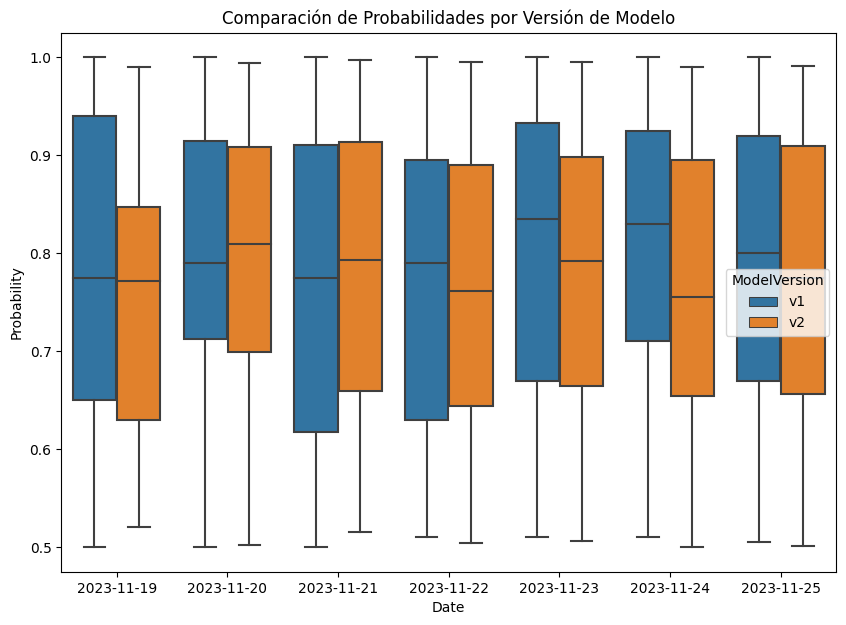

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.title("Comparación de Probabilidades por Versión de Modelo")
sns.boxplot(results_df, x='Date', y='Probability', hue='ModelVersion')

De la gráfica anterior se puede observar que no parece haber una diferencia entre las dos versiones del modelo de Churn construido frente a la probabilidad que predicen. Sin embargo, para verificar esto tendremos que realizar una prueba estadística como un t-test para poder comprobar lo anterior.

In [ ]:
from scipy import stats


results_df['Probability'] = pd.to_numeric(results_df['Probability'])


prob_v1 = results_df[results_df['ModelVersion'] == 'v1']['Probability']
prob_v2 = results_df[results_df['ModelVersion'] == 'v2']['Probability']

# Test de Shapiro-Wilk para normalidad
print("Normalidad - Modelo v1:", stats.shapiro(prob_v1))
print("Normalidad - Modelo v2:", stats.shapiro(prob_v2))

# Realizar t-test para muestras independientes
t_test_result = stats.ttest_ind(prob_v1, prob_v2, equal_var=False)
print("t-test para muestras independientes:", t_test_result)

Normalidad - Modelo v1: ShapiroResult(statistic=0.9424281120300293, pvalue=5.244853488149681e-13)
Normalidad - Modelo v2: ShapiroResult(statistic=0.9527653455734253, pvalue=1.4836194772716027e-11)
t-test para muestras independientes: Ttest_indResult(statistic=1.6914057457982299, pvalue=0.0910717639042875)


Dado que el p valor de la prueba t es mayor a 0.05 (nuestro nivel de significancia definido), podemos concluir que la media de probabilidad de los modelos no es diferente. En otras palabras, el movelo V2 no tiene probabilidades estadisticamente diferentes al modelo base o V1.

### <font color='red'>**Punto 5b**</font>



In [ ]:
results_df['Prediction'] = pd.to_numeric(results_df['Prediction'])

# Agrupar por fecha y versión del modelo y contar predicciones de churn
churn_counts = results_df.groupby(['Date', 'ModelVersion'])['Prediction'].sum().reset_index()

churnv1=churn_counts[churn_counts['ModelVersion']=='v1']
churnv2=churn_counts[churn_counts['ModelVersion']=='v2']

df_final=churnv2.merge(churnv1, how='left', on=['Date'])
df_final['CambioPorcentual']=((df_final['Prediction_x']-df_final['Prediction_y'])/df_final['Prediction_y'])*100

df_final=df_final.rename(columns={'Prediction_x':'Prediccion_V2','Prediction_y':'Prediccion_V1'})
df_final.loc[:,['Date', 'Prediccion_V2','Prediccion_V1','CambioPorcentual']]

,Date,Prediccion_V2,Prediccion_V1,CambioPorcentual
0,2023-11-19,21,16,31.250000
1,2023-11-20,20,19,5.263158
2,2023-11-21,23,16,43.750000
3,2023-11-22,32,15,113.333333
4,2023-11-23,27,11,145.454545
5,2023-11-24,28,19,47.368421
6,2023-11-25,25,18,38.888889


En conclusión podemos observar como el modelo V2 en todos los días simulados tiene un incremento en sus predicciones de clase 1 o clase de churn. Esto nos indica que el modelo tiende a identificar mejor los clientes churned y por eso revisaremos la métrica de recall.

### <font color='red'>**Punto 5c**</font>

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd


results_df['Prediction'] = pd.to_numeric(results_df['Prediction'])
results_df['ActualChurn'] = pd.to_numeric(results_df['ActualChurn'])

# Crear un DataFrame para almacenar las métricas diarias y por versión del modelo
metrics_df = pd.DataFrame(columns=['Date', 'ModelVersion', 'Precision', 'Recall', 'F1-Score'])

# Calcular las métricas para cada día y cada versión del modelo
for date in results_df['Date'].unique():
    for model_version in results_df['ModelVersion'].unique():
        daily_model_data = results_df[(results_df['Date'] == date) & (results_df['ModelVersion'] == model_version)]


        if not daily_model_data.empty:
            precision = precision_score(daily_model_data['ActualChurn'], daily_model_data['Prediction'])
            recall = recall_score(daily_model_data['ActualChurn'], daily_model_data['Prediction'])
            f1 = f1_score(daily_model_data['ActualChurn'], daily_model_data['Prediction'])

            # Agregar las métricas al DataFrame
            metrics_df = metrics_df.append({
                'Date': date,
                'ModelVersion': model_version,
                'Precision': precision,
                'Recall': recall,
                'F1-Score': f1
            }, ignore_index=True)

print(metrics_df)



The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

          Date ModelVersion  Precision    Recall  F1-Score
0   2023-11-19           v1   0.812500  0.481481  0.604651
1   2023-11-19           v2   0.523810  0.611111  0.564103
2   2023-11-20           v1   0.473684  0.500000  0.486486
3   2023-11-20           v2   0.650000  0.928571  0.764706
4   2023-11-21           v1   0.750000  0.545455  0.631579
5   2023-11-21           v2   0.608696  0.933333  0.736842
6   2023-11-22           v1   0.666667  0.454545  0.540541
7   2023-11-22           v2   0.437500  0.777778  0.560000
8   2023-11-23           v1   0.545455  0.461538  0.500000
9   2023-11-23           v2   0.555556  0.789474  0.652174
10  2023-11-24           v1   0.578947  0.647059  0.611111
11  2023-11-24           v2   0.571429  0.842105  0.680851
12  2023-11-25           v1   0.722222  0.590909  0.650000
13  2023-11-25           v2   0.640000  0.761905  0.695652


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Como vemos de los resultados previos, lo que mas nos interesa es la clase de recall. Ya que esta es la proporción de positivos reales que fueron identificados correctamente por el modelo. Vemos que los valores de recall varían. Sin embargo, en 6 de 7 días el modelo V2 tuvo mejores resultados que el modelo base, indicando que es un potencial mejor modelo que el primer modelo presentado.

### <font color='red'>**Análisis y Conclusiones**</font>

En general, podemos observar que lo modelo V2 tiene unos resultados aceptables, probados con información nueva que el modelo nunca antes ha visto. Por esto, concluimos que el modelo implementado es una excelente primera versión.  No obstante, proyectamos que su evolución necesitará un proceso de reentrenamiento continuo con el fin de integrar nuevas variables e información relevante. Esta estrategia de mejora garantizará un modelo más robusto y preciso con el paso del tiempo.